
# FUN CHALLENGE - The Sphinx's Solvers:
15 exercises that blend together:
Python basics
Data loading/cleaning
Statistics
Visualization
Machine learning intro







**Section 1: Imports and Data Creation**


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Make some sample data for testing
np.random.seed(123)
data = {
    'age': np.random.randint(22, 60, 80),
    'income': np.random.randint(35000, 95000, 80),
    'years_exp': np.random.randint(1, 25, 80),
    'education': np.random.choice(['HS', 'College', 'Grad'], 80),
    'location': np.random.choice(['Urban', 'Suburban', 'Rural'], 80)
}
df = pd.DataFrame(data)


In [ ]:
**Section 2: Data Exploration Functions**
This section includes Task #01 ,Task #02, Task #04


In [7]:
# Task 1. Show first few rows
print("First 7 entries:")
print(df.head(7))
print()

#Task  2. Check dataset size
def check_size(data):
    rows, cols = data.shape
    return rows, cols

size = check_size(df)
print(f"Data has {size[0]} rows and {size[1]} columns")
print()

#Task  4. Basic stats
numeric_cols = df.select_dtypes(include=[np.number])
stats = numeric_cols.agg(['mean', 'median', 'var', 'std'])
print("Numeric column stats:")
print(stats)
print()

#Task  6. List stats function
def quick_stats(vals):
    return {
        'total': len(vals),
        'average': np.mean(vals),
        'low': np.min(vals),
        'high': np.max(vals),
        'spread': np.std(vals)
    }

First 7 entries:
   age  income  years_exp education  location
0   24   68206         13   College  Suburban
1   50   70355          2      Grad     Urban
2   56   46046         24        HS     Rural
3   39   75337         10      Grad     Urban
4   41   47221         15   College     Rural
5   44   86054         24   College     Urban
6   55   55298          2        HS     Rural

Data has 80 rows and 5 columns

Numeric column stats:
               age        income  years_exp
mean     39.950000  6.684079e+04  11.937500
median   40.000000  6.688750e+04  11.000000
var     124.022785  2.686281e+08  58.945411
std      11.136552  1.638988e+04   7.677592



**Section 3: Data Visualization**
 This section includes Task #05 ,Task #013, Task #14
 Dispalyed Different Graphs like  **HISTOGRAM** ,**SCATTER PLOT** ,**HEATMAP**


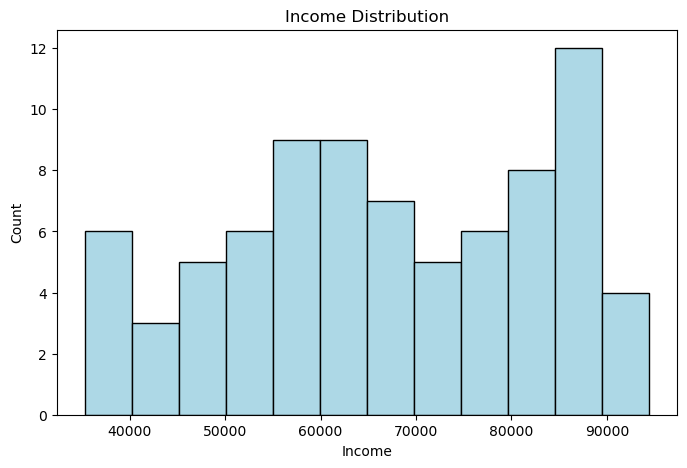

Plotted income histogram



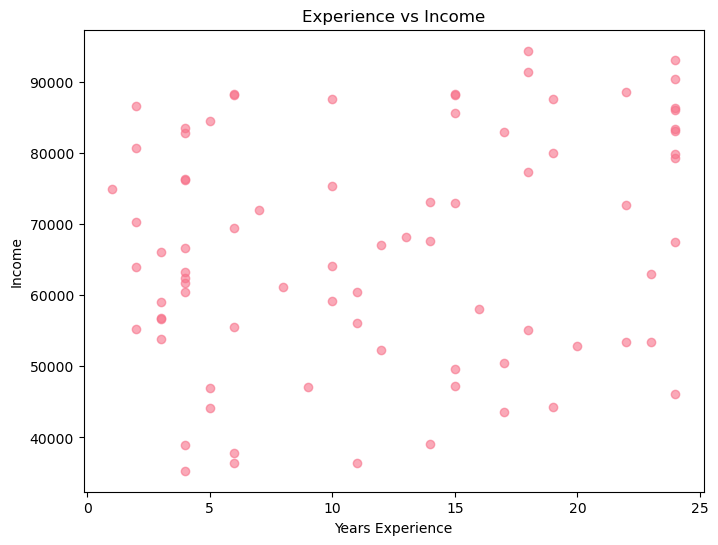

Scatter plot shown



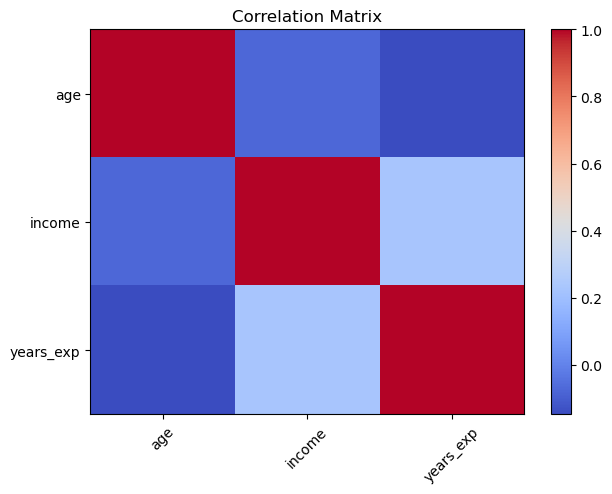

Correlation heatmap displayed



In [8]:
# Task 5. Plot income distribution
plt.figure(figsize=(8, 5))
plt.hist(df['income'], bins=12, color='lightblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()
print("Plotted income histogram")
print()

# Task 13. Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['years_exp'], df['income'], alpha=0.6)
plt.title('Experience vs Income')
plt.xlabel('Years Experience')
plt.ylabel('Income')
plt.show()
print("Scatter plot shown")
print()

#  Task 14. Correlations
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(7, 5))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()
print("Correlation heatmap displayed")
print()

**Section 4: Data Preprocessing**
This Section Includes Task#03 and Task #11

In [9]:
# 3. Split data for training
X = df[['age', 'years_exp']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print()

# 11. Scale age data
scaler = MinMaxScaler()
scaled_ages = scaler.fit_transform(df[['age']])

print("First 10 scaled ages:")
for i in range(10):
    print(f"{df['age'].iloc[i]} -> {scaled_ages[i][0]:.3f}")
print()

Train size: (56, 2), Test size: (24, 2)

First 10 scaled ages:
24 -> 0.054
50 -> 0.757
56 -> 0.919
39 -> 0.459
41 -> 0.514
44 -> 0.595
55 -> 0.892
54 -> 0.865
31 -> 0.243
54 -> 0.865



**Section 5:Machine Learning Model**
This Section has only task # 10

In [10]:
#  Task 10. Simple prediction model
X_pred = df[['years_exp']]
y_pred = df['income']

model = LinearRegression()
model.fit(X_pred, y_pred)

print(f"Slope: {model.coef_[0]:.2f}")
print(f"Starting point: {model.intercept_:.2f}")
print()

Slope: 496.75
Starting point: 60910.84



**Section 6: Data Analysis and Grouping**
This Section Includes Task#12 and Task #6 and mainly focusses on finding the stats function on the gathered data.


In [11]:
# Task 12. Group by education
edu_groups = df.groupby('education')['income'].mean()
print("Average income by education:")
print(edu_groups)
print()

# Task 6. List stats example
nums = [34, 67, 23, 89, 45, 12, 78, 56, 32, 90, 41, 29, 83, 17, 61]
avg = np.mean(nums)
mid = np.median(nums)
print(f"Numbers: {nums}")
print(f"Average: {avg:.1f}, Middle: {mid}")
print()

# Quick stats function usage
test_data = [45, 32, 67, 29, 51, 38, 42]
results = quick_stats(test_data)
print(f"Test data: {test_data}")
for k, v in results.items():
    print(f"{k}: {v:.2f}")
print()

Average income by education:
education
College    66159.529412
Grad       67080.923077
HS         67686.750000
Name: income, dtype: float64

Numbers: [34, 67, 23, 89, 45, 12, 78, 56, 32, 90, 41, 29, 83, 17, 61]
Average: 50.5, Middle: 45.0

Test data: [45, 32, 67, 29, 51, 38, 42]
total: 7.00
average: 43.43
low: 29.00
high: 67.00
spread: 11.87



**Section 7: Data I/O Operations**
This Section Includes Task# 09

In [12]:
#Task  9. CSV test
df.to_csv('test_data.csv', index=False)
temp_df = pd.read_csv('test_data.csv')

print("Data info:")
print(temp_df.info())
print("\nBasic stats:")
print(temp_df.describe())
print()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        80 non-null     int64 
 1   income     80 non-null     int64 
 2   years_exp  80 non-null     int64 
 3   education  80 non-null     object
 4   location   80 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.3+ KB
None

Basic stats:
             age        income  years_exp
count  80.000000     80.000000  80.000000
mean   39.950000  66840.787500  11.937500
std    11.136552  16389.878685   7.677592
min    22.000000  35321.000000   1.000000
25%    30.500000  54791.000000   4.000000
50%    40.000000  66887.500000  11.000000
75%    49.250000  82910.750000  18.000000
max    59.000000  94400.000000  24.000000



**Section 8: Data Cleaning**
This Section Includes Task#03

In [14]:
# Task 15. Clean and save
df_clean = df.copy()

# Add some missing values randomly
for col in df_clean.columns:
    if np.random.random() > 0.8:
        df_clean.loc[df_clean.sample(frac=0.1).index, col] = np.nan

print("Missing values before cleaning:")
print(df_clean.isna().sum())
print()

# Fill missing values - FIXED VERSION
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("Missing values after cleaning:")
print(df_clean.isna().sum())
print()

df_clean.to_csv('cleaned_data.csv', index=False)
print("Saved cleaned data to 'cleaned_data.csv'")

Missing values before cleaning:
age          0
income       0
years_exp    0
education    8
location     0
dtype: int64

Missing values after cleaning:
age          0
income       0
years_exp    0
education    0
location     0
dtype: int64

Saved cleaned data to 'cleaned_data.csv'


**Section 9: Utility Functions**
This Section Includes Task#08


In [15]:
# Task 8. Random matrix
rand_matrix = np.random.randint(10, 60, (6, 6))
print("Random 6x6 matrix:")
print(rand_matrix)
print()

# Clean up
import os
if os.path.exists('test_data.csv'):
    os.remove('test_data.csv')

Random 6x6 matrix:
[[18 57 47 32 32 10]
 [30 41 54 35 42 18]
 [26 15 55 16 16 46]
 [14 42 59 19 26 49]
 [37 56 55 31 30 56]
 [41 41 45 40 15 30]]

